In [3]:
! pip install pandas textblob nltk matplotlib


In [130]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Prateek
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prateek Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [131]:
! pip install wordcloud

In [132]:
! pip install nltk

In [133]:
! pip install wordcloud

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re

In [2]:
# Download stopwords list
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\Prateek
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('HP Pay reviews.csv')

In [4]:
df

,Review,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,very good,5,0,5.37,09-06-2025 08:53,5.37
1,my money has been deducted twice for booking L...,1,0,5.37,09-06-2025 08:12,5.37
2,slow,3,0,5.37,08-06-2025 18:02,5.37
3,बहुत ज्यादा बेकार आप है बार-बार अमाउंट प्रॉसेस...,1,0,5.37,08-06-2025 15:33,5.37
4,The booking status page for HP Gas is only loa...,1,0,5.37,08-06-2025 14:14,5.37
...,...,...,...,...,...,...
19995,"very good experience, but many of their outlet...",5,1,3.6.0,17-03-2019 18:14,3.6.0
19996,I paid money by upi after that when payment is...,2,5,3.6.0,17-03-2019 18:09,3.6.0
19997,good,5,0,3.6.0,17-03-2019 14:54,3.6.0
19998,Very bad app,1,0,3.6.0,17-03-2019 14:36,3.6.0


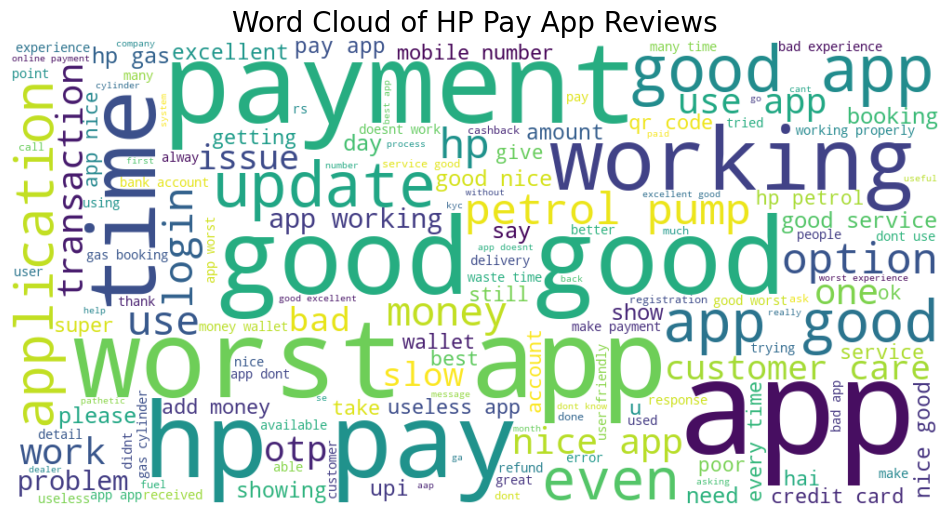

In [74]:
def clean_text(df):
    # Remove special characters and numbers
    df = re.sub(r"[^a-zA-Z\s]", "", df)
    # Convert to lowercase and split into words
    words = df.lower().split()
    # Remove stopwords
    cleaned_words = [word for word in words if word not in stop_words]
    return " ".join(cleaned_words)

df['cleaned_review'] = df['Review'].astype(str).apply(clean_text)

full_text = " ".join(df['cleaned_review'])
#cleaned_text = clean_text(df)
#print(cleaned_text)


wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis',
    max_words=150,
    contour_color='coolwarm',
    contour_width=3
).generate(full_text)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of HP Pay App Reviews", fontsize=20)
plt.show()


In [75]:
df = df.dropna(subset=['Review'])

In [76]:
df

,Review,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_review
0,very good,5,0,5.37,09-06-2025 08:53,5.37,good
1,my money has been deducted twice for booking L...,1,0,5.37,09-06-2025 08:12,5.37,money deducted twice booking lpg gas booking t...
2,slow,3,0,5.37,08-06-2025 18:02,5.37,slow
3,बहुत ज्यादा बेकार आप है बार-बार अमाउंट प्रॉसेस...,1,0,5.37,08-06-2025 15:33,5.37,
4,The booking status page for HP Gas is only loa...,1,0,5.37,08-06-2025 14:14,5.37,booking status page hp gas loading app closes ...
...,...,...,...,...,...,...,...
19995,"very good experience, but many of their outlet...",5,1,3.6.0,17-03-2019 18:14,3.6.0,good experience many outlets accepting
19996,I paid money by upi after that when payment is...,2,5,3.6.0,17-03-2019 18:09,3.6.0,paid money upi payment successful bhim app aut...
19997,good,5,0,3.6.0,17-03-2019 14:54,3.6.0,good
19998,Very bad app,1,0,3.6.0,17-03-2019 14:36,3.6.0,bad app


In [77]:
# Function to calculate polarity
def get_sentiment(df):
    blob = TextBlob(df)
    return blob.sentiment.polarity

In [78]:
# Apply sentiment analysis
df['Polarity'] = df['Review'].apply(get_sentiment)

In [79]:
df['Polarity']

0        0.910000
1        0.081481
2       -0.300000
3        0.000000
4       -0.083333
           ...   
19995    0.705000
19996    0.050000
19997    0.700000
19998   -0.910000
19999    0.000000
Name: Polarity, Length: 20000, dtype: float64

In [80]:
# Classify sentiment
def classify_sentiment(score):
    if score > 0.2:
        return 'Positive'
    elif score < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

In [81]:
# Show sample results
print(df[['Review', 'Polarity', 'Sentiment']])


                                                  Review  Polarity Sentiment
0                                              very good  0.910000  Positive
1      my money has been deducted twice for booking L...  0.081481   Neutral
2                                                   slow -0.300000  Negative
3      बहुत ज्यादा बेकार आप है बार-बार अमाउंट प्रॉसेस...  0.000000   Neutral
4      The booking status page for HP Gas is only loa... -0.083333   Neutral
...                                                  ...       ...       ...
19995  very good experience, but many of their outlet...  0.705000  Positive
19996  I paid money by upi after that when payment is...  0.050000   Neutral
19997                                               good  0.700000  Positive
19998                                       Very bad app -0.910000  Negative
19999            add hdfc payzapp option in payment mode  0.000000   Neutral

[20000 rows x 3 columns]


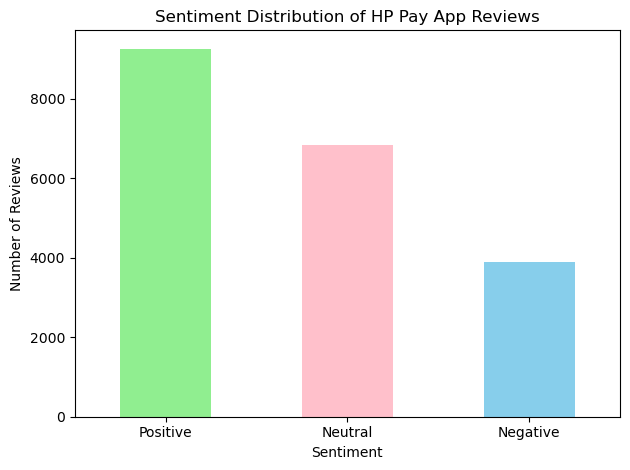

In [83]:
# Optional: Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['lightgreen', 'pink', 'skyblue'])
plt.title('Sentiment Distribution of HP Pay App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
